Conjoint analysis is a method to find the most prefered settings of a product [11].

Usual fields of usage [3]:
- Marketing
- Product management
- Operation Research

For example:
- testing customer acceptance of new product design.
- assessing appeal of advertisements and service design.

In [1]:
import pandas as pd
import numpy as np

Here we used Immigrant conjoint data described by [6]. It consists of 2 possible conjoint methods: choice-based conjoint (with `selected` column as target variable) and rating-based conjoint (with `rating` as target variable). 

# Preparing The Data

In [2]:
# taken from imigrant conjoint data
df = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/2445996?format=tab&gbrecs=true', delimiter='\t')

In [3]:
df.head()

,resID,atmilitary,atreligion,ated,atprof,atinc,atrace,atage,atmale,selected,rating
0,383,1,6,3,6,6,1,6,2,0,0.333333
1,383,2,1,1,4,3,6,4,1,1,0.500000
2,383,1,3,5,5,1,2,5,2,1,0.666667
3,383,2,4,5,3,2,1,6,1,0,0.666667
4,383,2,1,2,3,6,2,2,2,0,0.333333


In [31]:
# checking for empty data
df.isnull().sum()

resID          0
atmilitary     0
atreligion     0
ated           0
atprof         0
atinc          0
atrace         0
atage          0
atmale         0
selected       0
rating        10
dtype: int64

In [32]:
# remove empty data
clean_df = df[~df.rating.isnull()]

# Doing The Conjoint Analysis

In [48]:

y = clean_df['selected']
x = clean_df[[x for x in df.columns if x != 'selected' and x != 'resID' and x != 'rating']]

In [60]:
xdum = pd.get_dummies(x, columns=[c for c in x.columns if c != 'selected'])
xdum.head()

,atmilitary_1,atmilitary_2,atreligion_1,atreligion_2,atreligion_3,atreligion_4,atreligion_5,atreligion_6,ated_1,ated_2,...,atrace_5,atrace_6,atage_1,atage_2,atage_3,atage_4,atage_5,atage_6,atmale_1,atmale_2
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


[11] has complete definition of important attributes in Conjoint Analysis


**Utility of an alternative $U(x)$** is

$$
U(x) = \sum_{i=1}^{m}\sum_{j=1}^{k_{i}}u_{ij}x_{ij}
$$

where:

$u_{ij}$: part-worth contribution (utility of jth level of ith attribute)

$k_{i}$: number of levels for attribute i

$m$: number of attributes


**Importance of an attribute $R_{i}$** is defined as
$$
R_{i} = max(u_{ij})  - min(u_{ik})
$$
$R_{i}$ is the $i$-th attribute


**Relative Importance of an attribute $Rimp_{i}$** is defined as
$$
Rimp_{i} = \frac{R_{i}}{\sum_{i=1}^{m}{R_{i}}}
$$

Essentially conjoint analysis (traditional conjoint analysis) is doing **linear regression** where the target variable could be binary (**choice-based conjoint analysis**), or 1-7 likert scale (**rating conjoint analysis**), or ranking(**rank-based conjoint analysis**).


In [62]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [50]:
res = sm.OLS(y, xdum, family=sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               selected   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     10.72
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           7.39e-51
Time:                        15:49:37   Log-Likelihood:                -2343.3
No. Observations:                3456   AIC:                             4753.
Df Residuals:                    3423   BIC:                             4956.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
atmilitary_1     0.0808      0.008      9.585      0.000       0.064       0.097
atmilitary_2     0.1671      0.008     19.810      0.000       0.151       0.184
atreligion_1     0.0931      0.018      5.132      0.000       0.058       0.129
atreligion_2     0.0578      0.018      3.144      0.002       0.022       0.094
atreligion_3     0.0803      0.018      4.411      0.000       0.045       0.116
atreligion_4     0.0797      0.018      4.326      0.000       0.044       0.116
atreligion_5    -0.0218      0.018     -1.185      0.236      -0.058       0.014
atreligion_6    -0.0411      0.018     -2.256      0.024      -0.077      -0.005
ated_1          -0.1124      0.018     -6.115      0.000      -0.148      -0.076
ated_2           0.0278      0.019      1.464      0.143      -0.009       0.065
ated_3           0.0366      0.019      1.942      0.052      -0.000       0.074
ated_4           0.0737      0.018      4.076      0.000       0.038       0.109
ated_5           0.0649      0.018      3.570      0.000       0.029       0.101
ated_6           0.1572      0.018      8.949      0.000       0.123       0.192
atprof_1         0.1084      0.018      5.930      0.000       0.073       0.144
atprof_2         0.0852      0.019      4.597      0.000       0.049       0.122
atprof_3         0.0910      0.018      5.060      0.000       0.056       0.126
atprof_4         0.0674      0.018      3.716      0.000       0.032       0.103
atprof_5         0.0145      0.019      0.779      0.436      -0.022       0.051
atprof_6        -0.1186      0.018     -6.465      0.000      -0.155      -0.083
atinc_1          0.0081      0.018      0.448      0.654      -0.027       0.043
atinc_2          0.0316      0.019      1.662      0.097      -0.006       0.069
atinc_3          0.0716      0.018      4.020      0.000       0.037       0.106
atinc_4          0.0397      0.018      2.154      0.031       0.004       0.076
atinc_5          0.0808      0.018      4.451      0.000       0.045       0.116
atinc_6          0.0161      0.018      0.872      0.383      -0.020       0.052
atrace_1         0.0274      0.018      1.494      0.135      -0.009       0.063
atrace_2         0.0527      0.018      2.881      0.004       0.017       0.089
atrace_3         0.0633      0.018      3.556      0.000       0.028       0.098
atrace_4         0.0037      0.019      0.198      0.843      -0.033       0.040
atrace_5         0.0324      0.018      1.787      0.074      -0.003       0.068
atrace_6         0.0683      0.019      3.687      0.000       0.032       0.105
atage_1          0.0680      0.018      3.770      0.000       0.033       0.103
atage_2          0.0934      0.019      4.957      0.000       0.056       0.130
atage_3          0.0900      0.018      4.967      0.000       0.054       0.125
atage

In [41]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

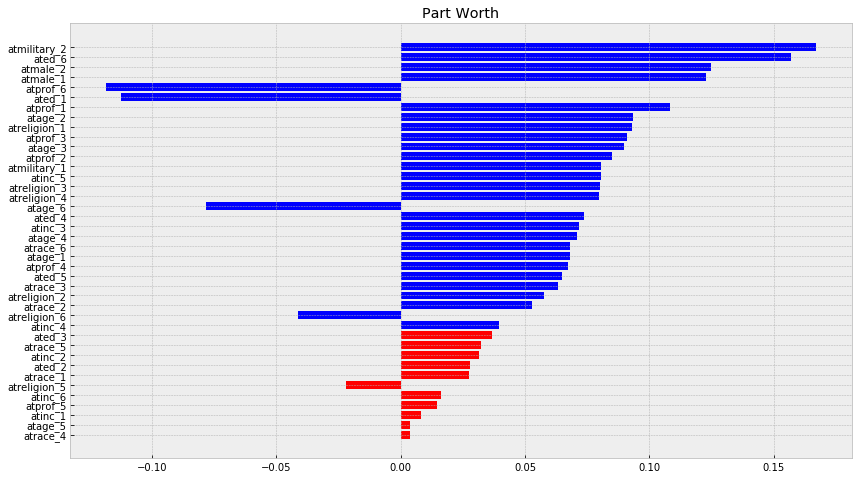

In [42]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

Now we will compute importance of every attributes, with definition from before, where:


$$
R_{i} = max(u_{ij})  - min(u_{ik})
$$




$$
Rimp_{i} = \frac{R_{i}}{\sum_{i=1}^{m}{R_{i}}}
$$


sum of importance on attributes will approximately equal to the target variable scale: if it is choice-based then it will equal to 1, if it is likert scale 1-7 it will equal to 7. In this case, importance of an attribute will equal with relative importance of an attribute because it is choice-based conjoint analysis (the target variable is binary).

In [43]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)

In [44]:
# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}

# compute relative importance per feature
# or normalized feature importance by dividing 
# sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}


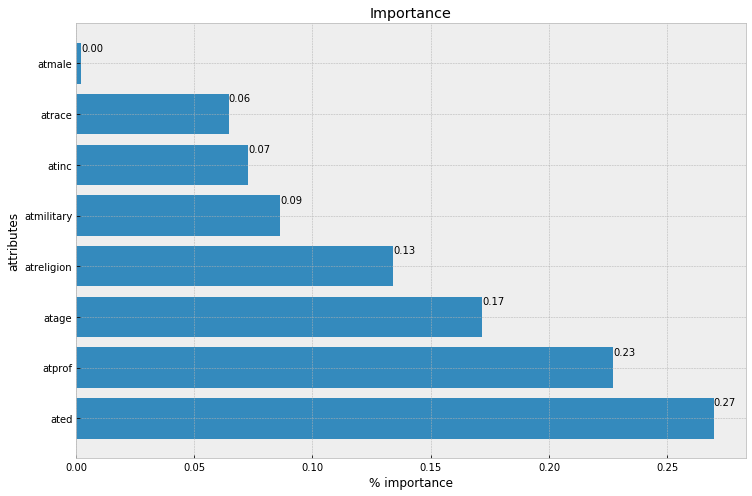

In [45]:
alt_data = pd.DataFrame(
    list(importance_per_feature.items()), 
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

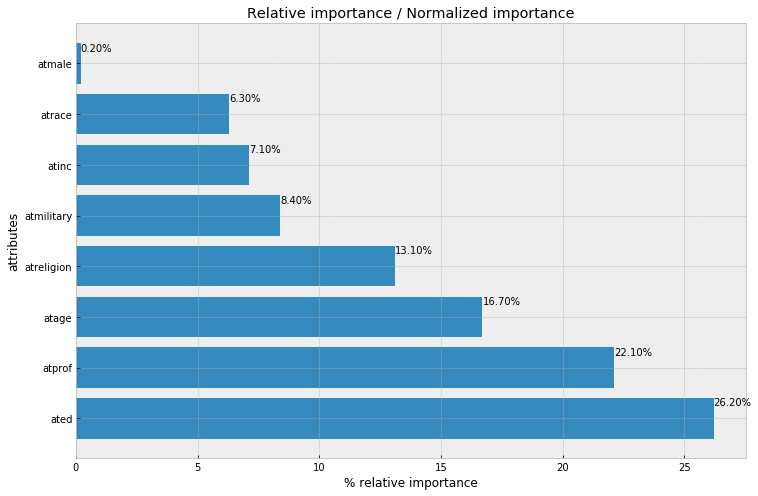

In [46]:
alt_data = pd.DataFrame(
    list(relative_importance_per_feature.items()), 
    columns=['attr', 'relative_importance (pct)']
).sort_values(by='relative_importance (pct)', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Relative importance / Normalized importance')
plt.barh(xbar, alt_data['relative_importance (pct)'])
for i, v in enumerate(alt_data['relative_importance (pct)']):
    ax.text(v , i + .25, '{:.2f}%'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

# References
[1] [Lifestyles on Github](https://github.com/CamDavidsonPilon/lifestyles)

[2] [Hierarchical Bayes](http://webuser.bus.umich.edu/plenk/HB%20Conjoint%20Lenk%20DeSarbo%20Green%20Young%20MS%201996.pdf)

[3] [Conjoint Analysis Wikipedia](https://en.wikipedia.org/wiki/Conjoint_analysis)

[4] [Conjoint Analysis - Towards Data Science Medium](https://towardsdatascience.com/conjoint-analysis-101-7bf5dfe1cdb2)

[5] [Hainmueller, Jens;Hopkins, Daniel J.;Yamamoto, Teppei, 2013, "Replication data for: Causal Inference in Conjoint Analysis: Understanding Multidimensional Choices via Stated Preference Experiments"](https://hdl.handle.net/1902.1/22603)

[6] [Causal Inference in Conjoint Analysis: Understanding
Multidimensional Choices via Stated Preference Experiments](http://web.mit.edu/teppei/www/research/conjoint.pdf)


[8] [Traditional Conjoin Analysis - Jupyter Notebook](https://github.com/Herka/Traditional-Conjoint-Analysis-with-Python/blob/master/Traditional%20Conjoint%20Analyse.ipynb)

[9] [Business Research Method - 2nd Edition - Chap 19](https://www.safaribooksonline.com/library/view/business-research-methods/9789352861620/xhtml/Chapter19.xhtml)

[10] [Tentang Data - Conjoint Analysis Part 1 (Bahasa Indonesia)](https://tentangdata.wordpress.com/2018/05/08/petunjuk-perancangan-dan-analisis-dalam-survei-conjoint-analysis-bag-1/)

[11] [Business Research Method, 2nd Edition, Chapter 19 (Safari Book Online)](https://www.safaribooksonline.com/library/view/business-research-methods/9789352861620/xhtml/Chapter19.xhtml)
